# (Opcional) Instalar librerías

In [ ]:
!pip install numpy
!pip install matplotlib
!pip install qiskit

# Importar paquetes

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

from qiskit.circuit import ParameterVector
from qiskit.quantum_info import SparsePauliOp
from qiskit.primitives import StatevectorEstimator as Estimator
from qiskit.circuit.library import EfficientSU2

# Establecer VQA

C:\Users\User 0135\AppData\Local\Temp\ipykernel_27116\213211483.py:8: DeprecationWarning: The class ``qiskit.circuit.library.n_local.efficient_su2.EfficientSU2`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. Use the function qiskit.circuit.library.efficient_su2 instead.
  ansatz = EfficientSU2(n_qubits, su2_gates=['rx', 'ry'], reps=n_layers, entanglement='full')


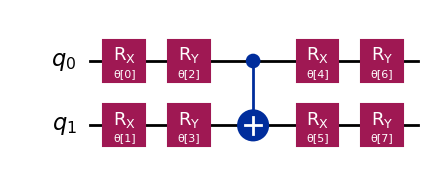

In [ ]:
# Parámetros Globales
n_qubits = 2
n_layers = 1

# ----------------------
# Ansatz y parámetros
# ----------------------
ansatz = EfficientSU2(n_qubits, su2_gates=['rx', 'ry'], reps=n_layers, entanglement='full')
params = ParameterVector("theta", ansatz.num_parameters)

# ----------------------
# Cost Function (Z⊗Z)
# ----------------------
observable = SparsePauliOp.from_list([("YI", -3),
                                      ("IZ", 5),
                                      ("ZI", -1),
                                      ("ZZ", 2),
                                      ("XX", 1)])

# Estimator
estimator = Estimator()

# Draw Circuit
ansatz.decompose().draw("mpl")

# Entrenamiento

In [ ]:
# -------------------------------
# Modelo y entrenamiento manual
# -------------------------------

cost_hist = []
def cost_func_vqe(params, ansatz, hamiltonian, estimator):
    """Return estimate of energy from estimator

    Parameters:
        params (ndarray): Array of ansatz parameters
        ansatz (QuantumCircuit): Parameterized ansatz circuit
        hamiltonian (SparsePauliOp): Operator representation of Hamiltonian
        estimator (Estimator): Estimator primitive instance

    Returns:
        float: Energy estimate
    """
    pub = (ansatz, hamiltonian, params)
    cost = estimator.run([pub]).result()[0].data.evs
    cost_hist.append(cost)
    return cost

x0 = np.ones(ansatz.num_parameters)

opt_result = minimize(cost_func_vqe, x0, args=(ansatz, observable, estimator), method="COBYLA")


# Resultados

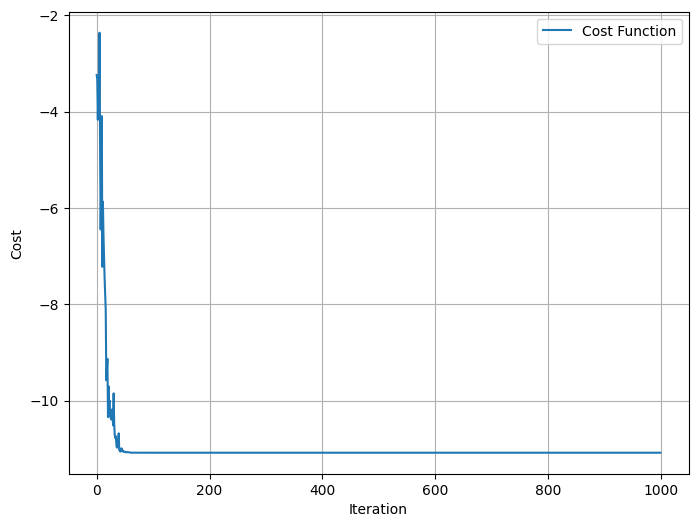

In [ ]:
# --------------------
# Gráficas
# --------------------
plt.figure(figsize=(8, 6))
plt.plot(cost_hist, label="Cost Function")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.grid()
plt.legend()